# Predicting Total Cholesterol from NHANES Biomarkers and Demographic Features

This report demonstrates how the NHANES Health Regression pipeline was applied to estimate **total cholesterol** using dietary, lifestyle, lab, and demographic features from the 2015–2016 cycle. 

I explore predictive performance, model comparison, and key drivers of total cholesterol based on multiple machine learning models.


In [20]:
import pandas as pd
from IPython.display import Image


## 1. Dataset Overview

We use NHANES 2015–2016 data with `total_cholesterol` as the target. After cleaning, the dataset contains `N` samples and `M` features. Features include anthropometric measurements, blood pressure, lab values, and survey-based variables.

Target summary:

- `total_cholesterol` (mg/dL)
- Log transform: No
- Drop extrema: Yes (5th–95th percentile applied to select features)


In [57]:
df = pd.read_csv("../data/processed/clean_data.csv")
df.describe()[["total_cholesterol"]]

total_cholesterol
count        6549.000000
mean          178.369217
std            31.690675
min           122.000000
25%           153.000000
50%           176.000000
75%           201.000000
max           254.000000

## 2. Exploratory Data Analysis

This section explores the distribution of the target variable (`total_cholesterol`) and examines relationships with both categorical and numerical input features.

**A) Target Distribution**  
The distribution of the target variable, `total_cholesterol` (mg/dL), is moderately right-skewed.  
A **log transformation** is applied during preprocessing to reduce skewness, stabilize variance, and improve model performance.  
This transformation is reversed during prediction to retain interpretability in original units.

**B) Feature Distributions (All Features)**  
Histograms are provided for all features.  
- Numerical features include KDE curves to assess shape, spread, and skew.  
- Categorical features are shown as bar plots, with labeled value mappings to clarify encoding (below).
- Values outside of the 5th and 95th percentiles are removed from all numerical features.

**C) Target vs. Categorical Features (Boxplots)**  
Boxplots visualize the distribution of `total_cholesterol` across categories for each categorical feature.  
This highlights group-level differences in the target (e.g., sex, race, smoking status).

**D) Target vs. Numerical Features (Univariate Regressions)**  
Each numerical feature is independently regressed against the target to estimate marginal predictive power.  
R² values are shown for each relationship, helping to identify strong individual predictors. Red trendlines are shown with a 95% confidence interval estimate (light red bar).

**E) Numeric Feature Correlations (Heatmap)**  
A Pearson correlation heatmap shows linear correlations between numeric features and the target.  
This helps assess redundancy among predictors and can inform feature selection or regularization strategies.

All visualizations are saved to the `figures/eda/` directory.


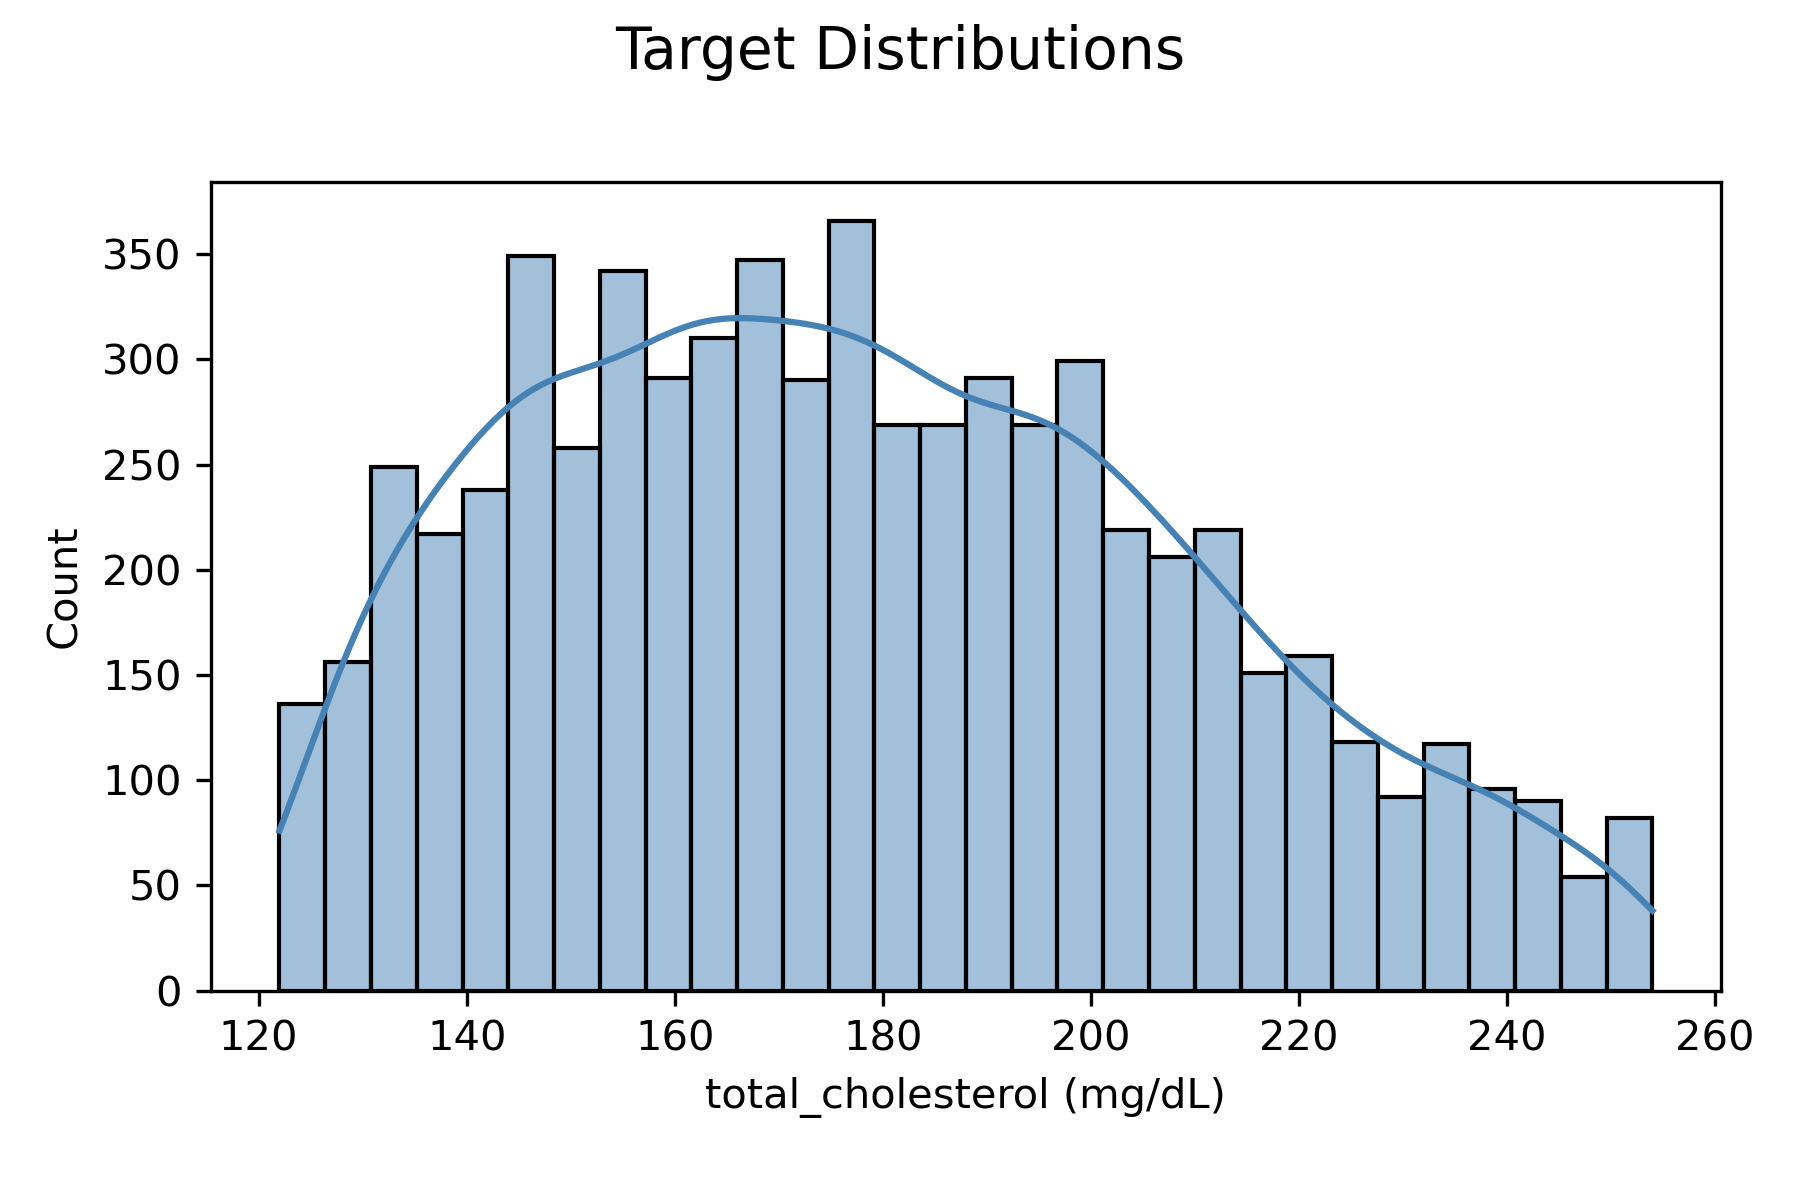

In [29]:
Image("../figures/eda/hist_targets.png")

In [41]:
Image("../figures/eda/hist_all_features.png")

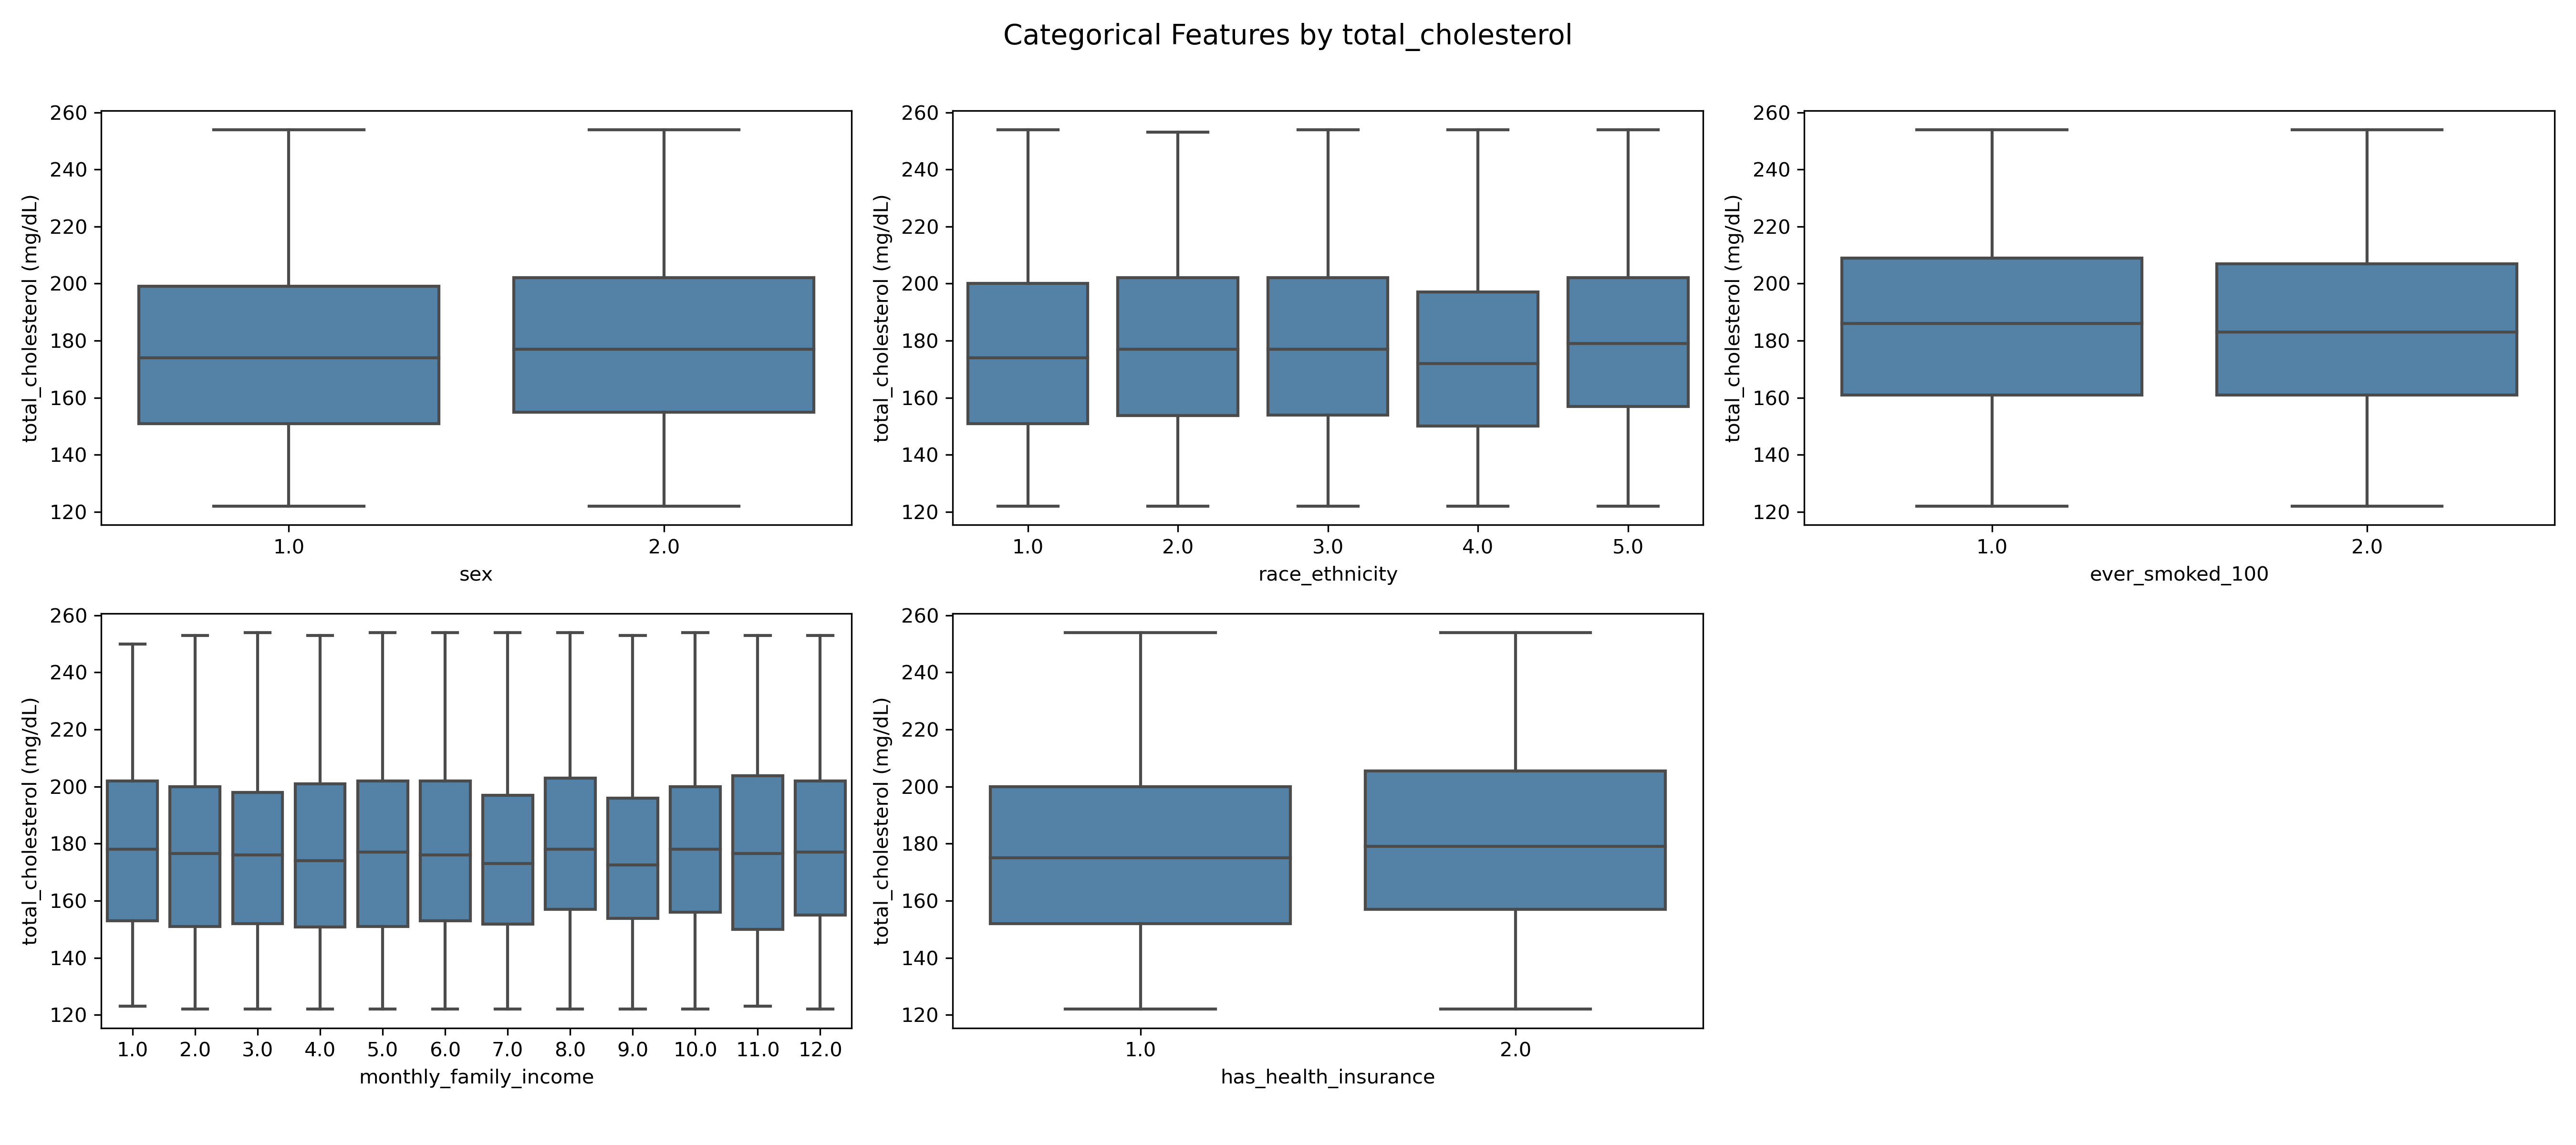

In [68]:
Image("../figures/eda/boxplot_total_cholesterol.png")

The categorical features are encodes as such:

- **sex**:  
  1.0 = Male  
  2.0 = Female

- **race_ethnicity**:  
  1.0 = Mexican American  
  2.0 = Other Hispanic  
  3.0 = Non-Hispanic White  
  4.0 = Non-Hispanic Black  
  5.0 = Other Race (including Multi-Racial)  

- **ever_smoked_100**:  
  1.0 = Yes  
  2.0 = No

- **monthly_family_income ($)**:  
  1.0 = 0 – 399  
  2.0 = 400 – 799  
  3.0 = 800 – 1,249  
  4.0 = 1,250 – 1,649  
  5.0 = 1,650 – 2,099  
  6.0 = 2,100 – 2,899  
  7.0 = 2,900 – 3,749  
  8.0 = 3,750 – 4,599  
  9.0 = 4,600 – 5,399  
  10.0 = 5,400 – 6,249  
  11.0 = 6,250 – 8,399  
  12.0 = 8,400 and over

- **has_health_insurance**:  
  1.0 = Yes  
  2.0 = No


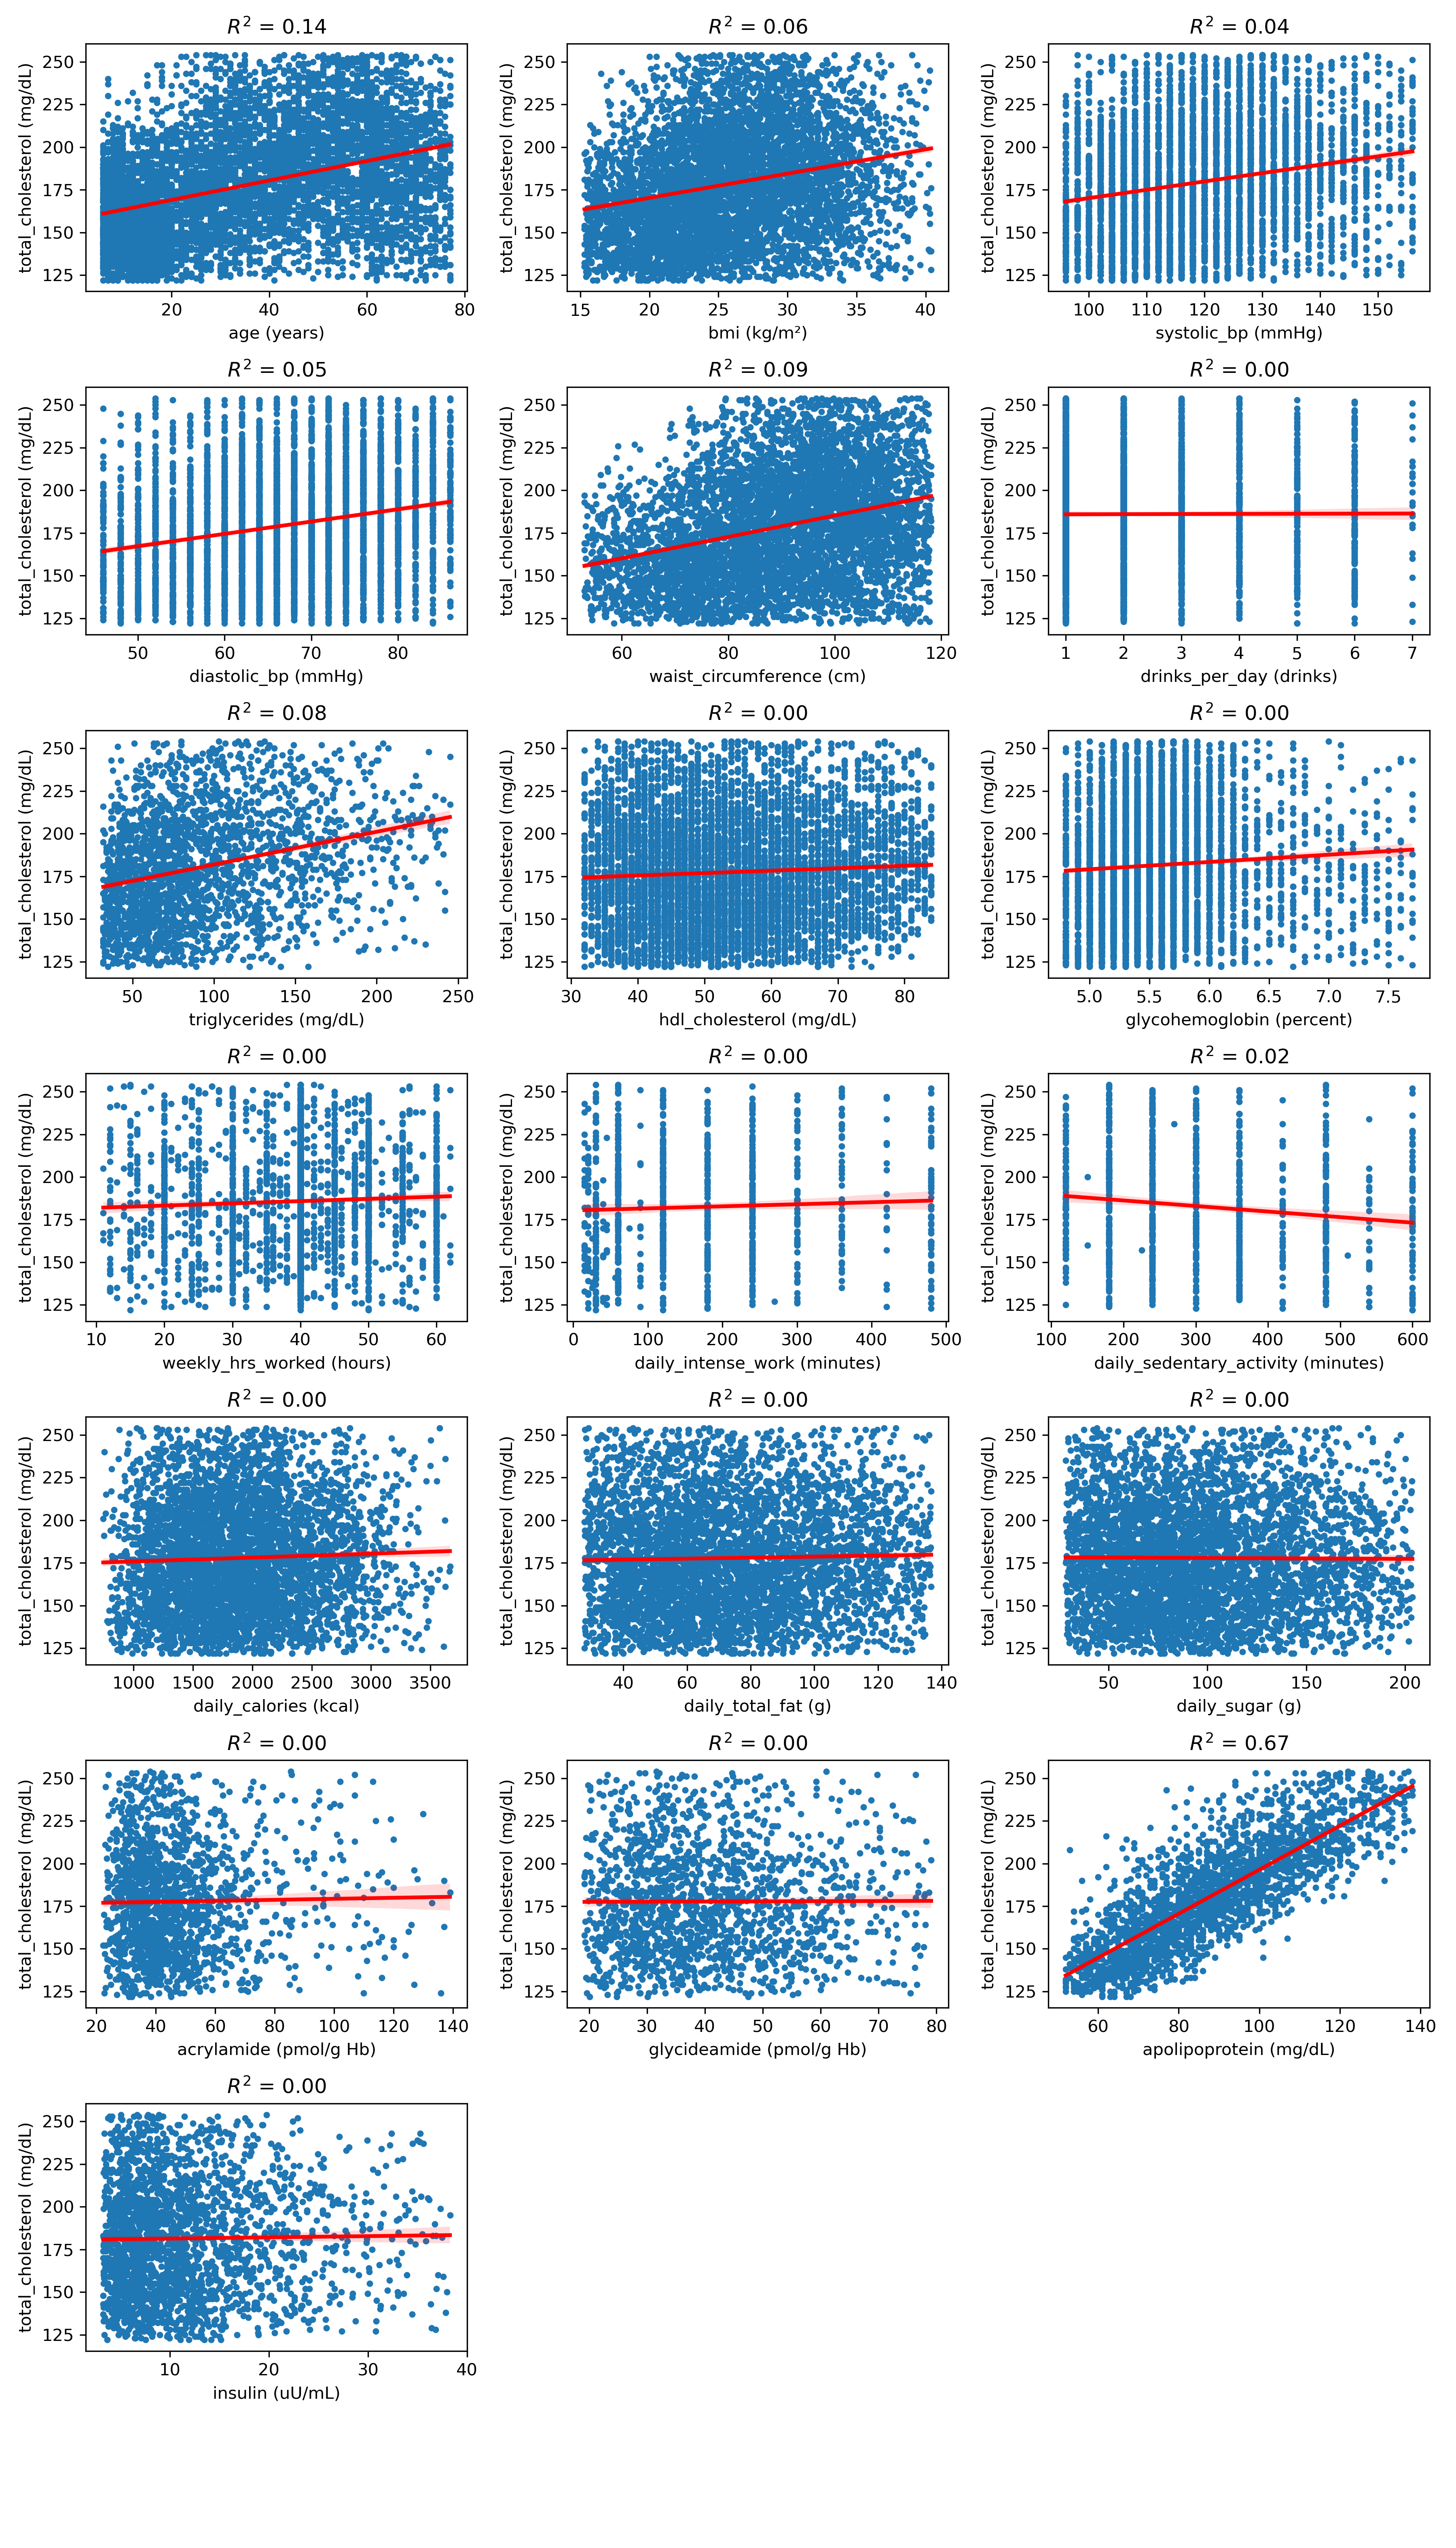

In [31]:
Image("../figures/eda/univariate_total_cholesterol.png")

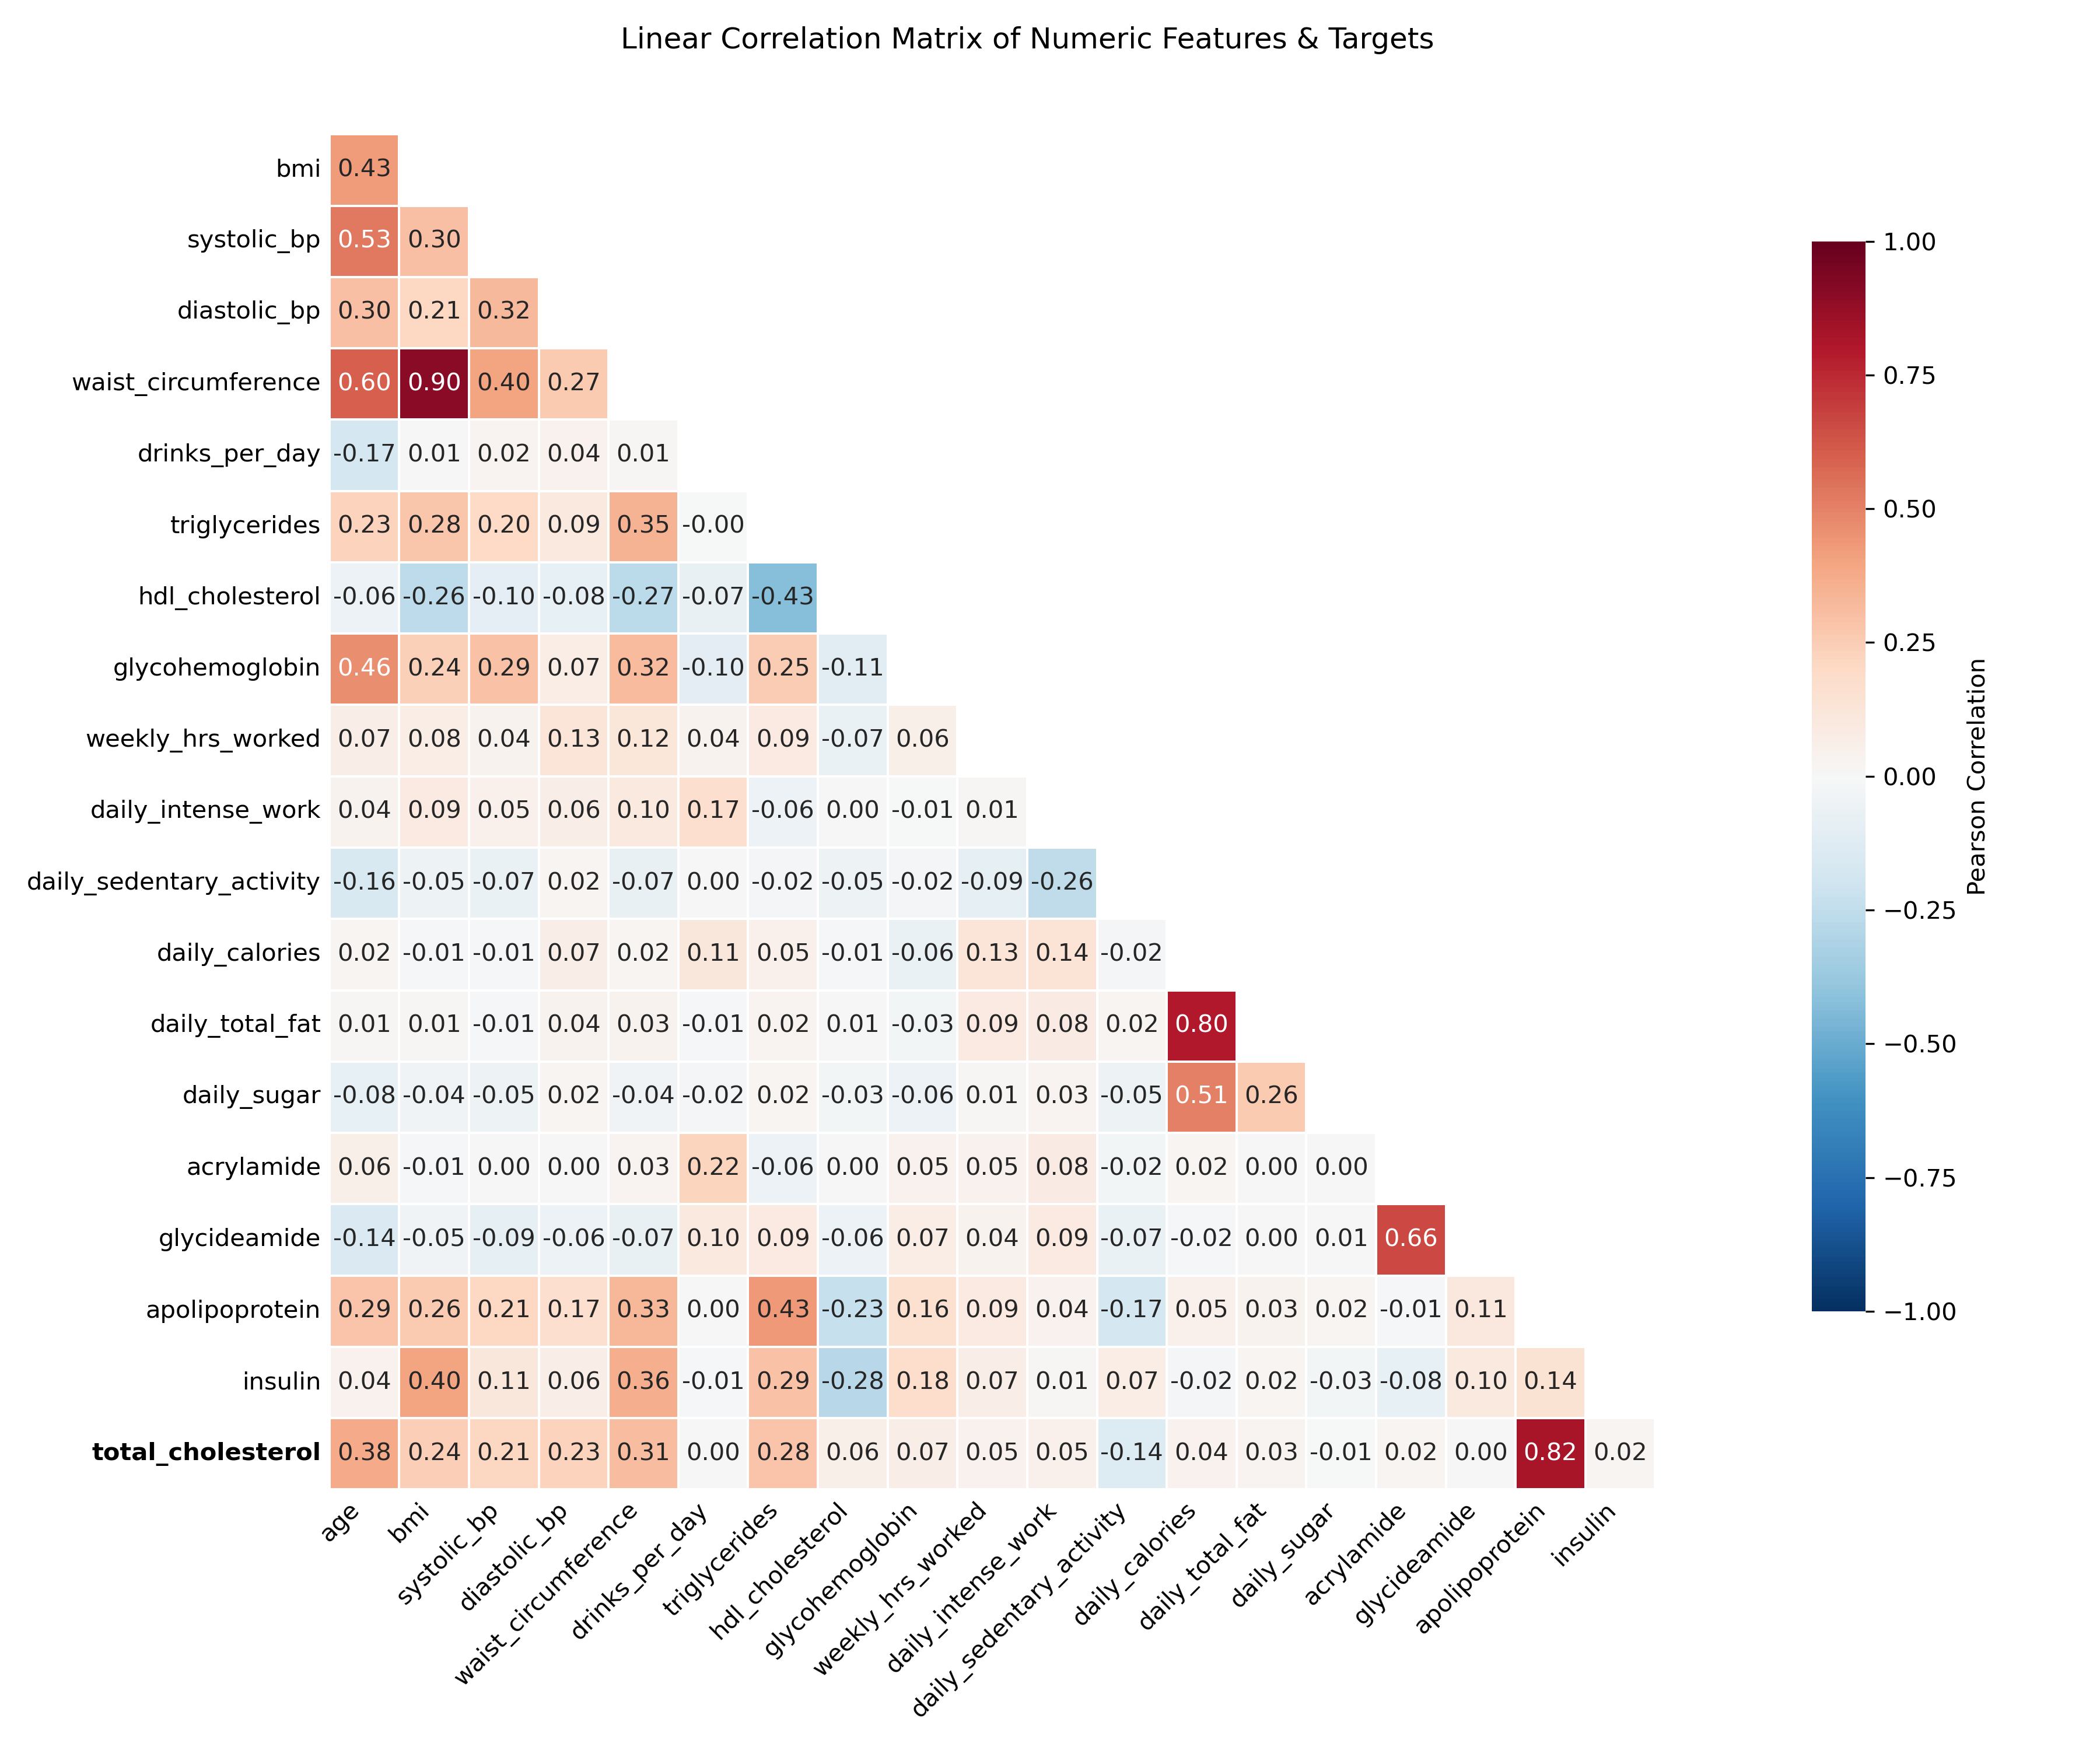

In [35]:
Image("../figures/eda/correlation_heatmap.png")

The figure above shows every combination of features (and targets) and their Pearson Correlation. The target `total_cholesterol` is bolded and corresponds to an expected strong positive correlation with apolipoprotein measurements and moderate positive correlations with `age`, `bmi`, `systolic_bp`, `diasolic_bp`, `waist_circumference`, and `triglycerides` features.

## 4. Residual Analysis

Residual histograms and predicted vs. true scatterplots were examined to identify bias or underfitting. Most models show well-centered errors, with tree-based models outperforming others on variance capture.


In [8]:
Image("../figures/evaluation/residuals_total_cholesterol.png")
Image("../figures/predictions/true_vs_predicted_total_cholesterol.png")


NameError: name 'Image' is not defined

## 5. Feature Importance

Feature importance was extracted for each model. XGBoost and Gradient Boosting identified **apolipoprotein**, **age**, and **triglycerides** as the top drivers of total cholesterol. 

These features align with clinical expectations and offer strong predictive value.


In [11]:
Image("../figures/feature_importance/feature_importance_xgboost_total_cholesterol.png")
Image("../figures/feature_importance/feature_importance_rf_total_cholesterol.png")


NameError: name 'Image' is not defined

## 6. Summary & Conclusions

- Tree-based models consistently outperformed others on both training and testing metrics.
- Apolipoprotein, age, triglycerides, and waist circumference were top predictors of total cholesterol.
- Several lifestyle features (e.g., daily sugar, income) showed limited predictive value in this context.

This example highlights the pipeline’s ability to combine diverse NHANES features to estimate clinically relevant biomarkers, with interpretable outputs and generalizable models.

Next steps could include:
- SHAP analysis for more detailed explanation
- External validation on earlier NHANES cycles
- Exploring reduced feature sets or interactions


## Model Performance Summary

Performance metrics (R² and RMSE) for each model and target, separated by train (80%) and test (20%) sets.


In [ ]:
# Load final model performance metrics
#train_metrics = pd.read_csv("../summaries/train_metrics.csv")
#test_metrics = pd.read_csv("../summaries/test_metrics.csv")
train_metrics = pd.read_csv("../tableau/train_metrics.csv")
test_metrics = pd.read_csv("../tableau/test_metrics.csv")

train_metrics["Dataset"] = "Train"
test_metrics["Dataset"] = "Test"
results_df = pd.concat([train_metrics, test_metrics], ignore_index=True)

display(results_df)

In [ ]:

# --- Helper to lighten a color ---
def lighten(color, factor=0.4):
    r, g, b = to_rgb(color)
    return (1 - factor) * r + factor, (1 - factor) * g + factor, (1 - factor) * b + factor

# --- Standardize model names ---
results_df["Model"] = results_df["Model"].str.title()

# --- Identify metric columns dynamically ---
r2_cols = [col for col in results_df.columns if col.startswith("R2")]
rmse_cols = [col for col in results_df.columns if col.startswith("RMSE")]

# --- Melt ---
r2_long = results_df.melt(
    id_vars=["Model", "Dataset"],
    value_vars=r2_cols,
    var_name="Metric_Target",
    value_name="R2"
)
rmse_long = results_df.melt(
    id_vars=["Model", "Dataset"],
    value_vars=rmse_cols,
    var_name="Metric_Target",
    value_name="RMSE"
)

# --- Extract target names ---
r2_long["Target"] = r2_long["Metric_Target"].str.replace("R2 - ", "").str.replace("R2_", "")
rmse_long["Target"] = rmse_long["Metric_Target"].str.replace("RMSE - ", "").str.replace("RMSE_", "")

# --- Compute Mean ---
r2_mean = r2_long.groupby(["Model", "Dataset"], as_index=False)["R2"].mean()
r2_mean["Target"] = "Mean"
rmse_mean = rmse_long.groupby(["Model", "Dataset"], as_index=False)["RMSE"].mean()
rmse_mean["Target"] = "Mean"

r2_long = pd.concat([r2_long, r2_mean], ignore_index=True)
rmse_long = pd.concat([rmse_long, rmse_mean], ignore_index=True)

# --- Normalize RMSE ---
rmse_long["RMSE_norm"] = rmse_long.groupby("Target")["RMSE"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# --- Add metric + value columns ---
r2_long["Metric"] = "R²"
r2_long["Value"] = r2_long["R2"]
rmse_long["Metric"] = "Normalized RMSE"
rmse_long["Value"] = rmse_long["RMSE_norm"]

# --- Combine ---
plot_df = pd.concat([r2_long, rmse_long], ignore_index=True)
plot_df["Target_Dataset"] = plot_df["Target"] + " (" + plot_df["Dataset"] + ")"

# --- Get unique targets from the data ---
unique_targets = sorted(plot_df["Target"].unique(), key=lambda x: (x != "Mean", x))

# --- Define base color palette automatically ---
base_palette = sns.color_palette("tab10", n_colors=len(unique_targets))
base_colors = dict(zip(unique_targets, base_palette))

# --- Build full palette with Train = light, Test = dark ---
palette = {}
hue_order = []
for target in unique_targets:
    base = base_colors[target]
    palette[f"{target} (Train)"] = lighten(base, 0.4)
    palette[f"{target} (Test)"] = base
    hue_order.append(f"{target} (Train)")
    hue_order.append(f"{target} (Test)")

# --- Apply categorical ordering to Target_Dataset ---
plot_df["Target_Dataset"] = pd.Categorical(plot_df["Target_Dataset"], categories=hue_order, ordered=True)

# --- Plot ---
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(14, 10), dpi=400, sharey=True)

for i, metric in enumerate(["R²", "Normalized RMSE"]):
    ax = axes[i]
    subset = plot_df[plot_df["Metric"] == metric].sort_values("Target_Dataset")
    sns.barplot(
        data=subset,
        x="Value",
        y="Model",
        hue="Target_Dataset",
        hue_order=hue_order,
        palette=palette,
        ax=ax,
        dodge=True,
        errorbar=None
    )
    ax.set_title(metric)
    ax.set_xlim(0, 1.05)
    ax.set_xlabel(metric)
    ax.set_ylabel("")
    ax.grid(False)
    ax.tick_params(axis="y", labelsize=9)
    ax.legend_.remove()

# --- Shared legend with correct order ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Target", loc="lower center", ncol=4, frameon=False)

# --- Title ---
fig.suptitle("Model Metrics by Target (Train vs Test)", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.07, 1, 0.95])
plt.show()


### 📊 Interpretation of Model Performance Metrics

This plot summarizes the performance of six regression models across three target variables:  
**diastolic blood pressure**, **creatinine**, and **daily sedentary activity**, along with a calculated **mean** score across all targets.

- **Left Panel (R²)**:  
  Shows the coefficient of determination (R²) for each model and target. Higher values indicate better explanatory power.  
  The "Mean" bars represent the average R² across the three targets for each model and dataset.

- **Right Panel (Normalized RMSE)**:  
  RMSE (Root Mean Squared Error) measures average prediction error.  
  However, because the original RMSE values vary significantly in scale across targets  
  (e.g., **creatinine** in thousands vs. **blood pressure** around 10), I apply **min-max normalization per target**:

  $$
  \text{RMSE}_{\text{norm}} = \frac{\text{RMSE} - \min(\text{RMSE})}{\max(\text{RMSE}) - \min(\text{RMSE})}
  $$

This transforms RMSE to a 0–1 scale *within each target group*, where:
- `0` = lowest (best) error across models  
- `1` = highest (worst) error across models

This enables fairer visual comparison across targets with different units.

---

### 🧠 Key Observations

- **KNN** shows near-perfect R² and minimal RMSE — likely an overfit on training data  
(worth confirming whether this is Train or Test set).
- **Gradient Boosting** and **Random Forest** generally offer strong performance  
with high R² and relatively low normalized RMSE.
- **SVR** and **XGBoost** underperform relative to ensemble methods, particularly on **creatinine** and **sedentary activity**.
- Mean metrics offer a useful summary but should always be considered **alongside per-target breakdowns** for interpretability.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Extract and clean R² and RMSE columns ---
r2_cols = [col for col in results_df.columns if col.startswith("R2")]
rmse_cols = [col for col in results_df.columns if col.startswith("RMSE")]

r2_df = results_df[["Model", "Dataset"] + r2_cols].copy()
rmse_df = results_df[["Model", "Dataset"] + rmse_cols].copy()

# --- Collapse to mean across targets ---
r2_df["R2_mean"] = r2_df[r2_cols].mean(axis=1)
rmse_df["RMSE_mean"] = rmse_df[rmse_cols].mean(axis=1)

# --- Merge back into a summary table ---
summary = pd.merge(r2_df[["Model", "Dataset", "R2_mean"]],
                   rmse_df[["Model", "Dataset", "RMSE_mean"]],
                   on=["Model", "Dataset"])

# --- Pivot: one row per model, split train/test ---
summary_wide = summary.pivot(index="Model", columns="Dataset", values=["R2_mean", "RMSE_mean"])
summary_wide.columns = ['R2_Test', 'R2_Train', 'RMSE_Test', 'RMSE_Train']
summary_wide = summary_wide.reset_index()

# --- Compute ratios and composite score ---
summary_wide["R2_Ratio"] = summary_wide["R2_Test"] / summary_wide["R2_Train"]
summary_wide["RMSE_Ratio"] = summary_wide["RMSE_Test"] / summary_wide["RMSE_Train"]

# Composite score: test R² minus overfit penalty minus RMSE penalty
alpha = 0.001
summary_wide["Composite_Score"] = (
    summary_wide["R2_Test"] 
    - (summary_wide["R2_Train"] - summary_wide["R2_Test"])  # penalize overfit
    - alpha * summary_wide["RMSE_Test"]                      # penalize absolute error
)

# --- Sort by best score ---
summary_wide = summary_wide.sort_values(by="Composite_Score", ascending=False).round(3)

# --- Display table ---
from IPython.display import display
display(summary_wide)

# --- Plot barplot of R² and RMSE test scores ---
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_wide, x="R2_Test", y="Model", color="#1f77b4", label="R² Test")
sns.barplot(data=summary_wide, x="R2_Train", y="Model", color="#aec7e8", label="R² Train", alpha=0.6)
plt.xlabel("R²")
plt.title("Train vs Test R² per Model")
plt.legend()
plt.grid(False)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


In [ ]:
# Scatter plot: Train vs Test R²
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=summary_wide,
    x="R2_Train",
    y="R2_Test",
    hue="Model",
    s=100
)

# Add 1:1 reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Ideal Generalization")

# Annotations
for i, row in summary_wide.iterrows():
    plt.text(row["R2_Train"] + 0.01, row["R2_Test"], row["Model"], fontsize=9)

plt.xlabel("Train R²")
plt.ylabel("Test R²")
plt.title("Train vs. Test R² per Model")
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
#plt.legend(loc="lower right", frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()
